In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Mmt = Base.classes.measurement
Stn = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

x = session.query(Mmt).first()
x.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19a74fb8358>,
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0}

In [57]:
y = session.query(Stn).first()
y.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19a029c8ba8>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

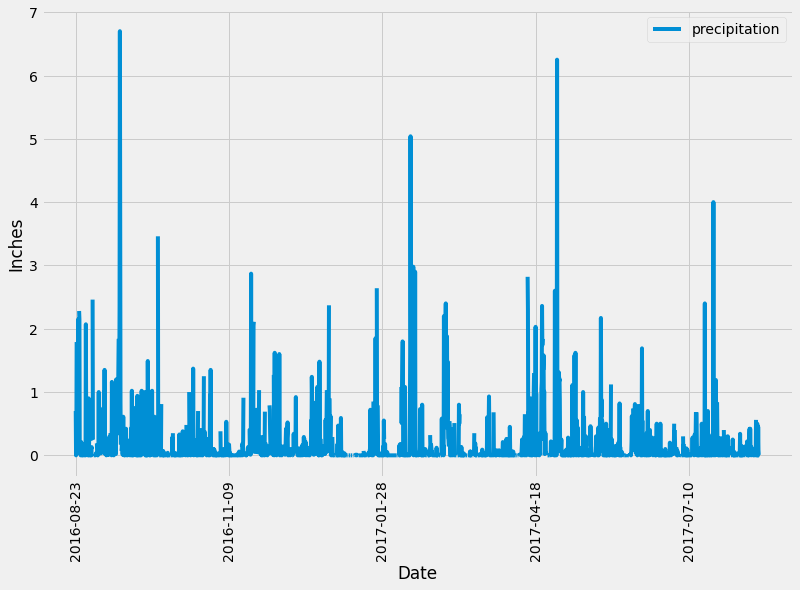

In [97]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = dt.date(2017,8,23)
query_date = last_date - dt.timedelta(days = 365)
query_date

# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(Mmt.date, Mmt.prcp).\
filter(Mmt.date >= query_date).\
order_by(Mmt.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(last_12_months, columns= ('Date','precipitation'))

# Sort the dataframe by date
prcp_df.dropna(how = "any")
prcp_df.sort_values(by = 'Date',inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x = 'Date', y = 'precipitation', kind = 'line', figsize = (12,8), rot ='vertical')
plt.ylabel('Inches')
plt.show()

In [98]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [99]:
# Design a query to show how many stations are available in this dataset?
len(session.query(Mmt.station).distinct().all())

9

In [100]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Mmt.station,func.count(Mmt.station)).\
group_by(Mmt.station).\
order_by(func.count(Mmt.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [95]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
results = session.query(Mmt.station,func.max(Mmt.tobs),func.min(Mmt.tobs),func.round(func.avg(Mmt.tobs),2)).\
filter(Mmt.station == 'USC00519281').all()

station_name, max_temp, min_temp, avg_temp = results[0]

print(f"Station {station_name} has a maximum temperature of {max_temp} fahrenheit and minimum temperature of {min_temp} fahrenheit")
print(f"and an average temperature of {avg_temp} fahrenheit")

Station USC00519281 has a maximum temperature of 85.0 fahrenheit and minimum temperature of 54.0 fahrenheit
and an average temperature of 71.66 fahrenheit


Text(0, 0.5, 'Frequency')

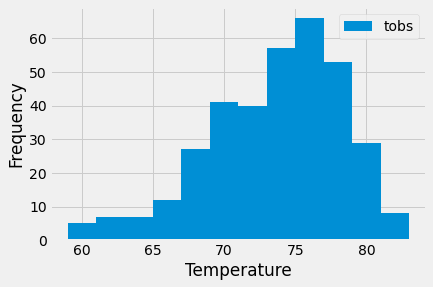

In [129]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Mmt.tobs).\
filter(Mmt.station == 'USC00519281').\
filter(Mmt.date >= query_date).all()

temps = [x[0] for x in temps]


plt.hist(temps, label= 'tobs', bins = 12)
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Frequency')

## Bonus Challenge Assignment

In [131]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
Measurement = Base.classes.measurement
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
